**Afshar - Q4**

ابتدا فایل صوتی داده شده را میخوانیم و اندازه تبدیل فوریه آن را رسم میکنیم.

Text(0, 0.5, 'Magnitude')

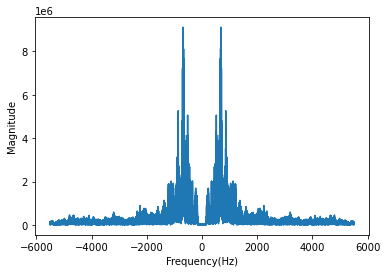

In [ ]:
#part 1
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from numpy.fft import fft, fftshift
from numpy import linspace
import sounddevice as sd

# Part 1
fs, x = read('test.wav')
write('temp.wav', fs, x)

sd.play(x, fs)

X = fftshift(fft(x))
f = linspace(-fs/2, fs/2, len(X))

plt.figure()
plt.plot(f, abs(X))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')

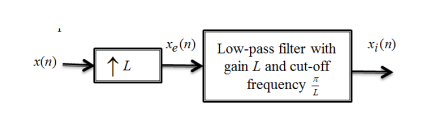

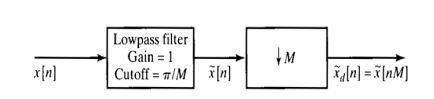

In [ ]:
# up-sampler and down-sampler functions
import numpy as np
from scipy.signal import lfilter
from scipy.signal import butter, lfilter

def Up_sampler(x, L, fs):
    x_upsampled = []
    for i in range(len(x)):
        x_upsampled.append(x[i])
        for j in range(L-1):
            x_upsampled.append(0)

    fcut = fs/(2*L)
    wpass = fcut/(fs/2)

    b, a = butter(5, wpass, btype='low')
    y = lfilter(b, a, x_upsampled)
    return y

def Down_sampler(x, M, fs):
    fcut = fs/(2*M)
    wpass = fcut/(fs/2)
    b, a = butter(5, wpass, btype='low')
    x = lfilter(b, a, x)
    x_downsampled = x[::M]
    return x_downsampled



Text(0.5, 1.0, 'up sampling with factor 3')

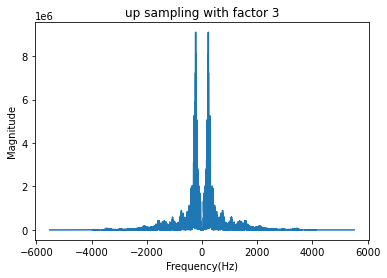

In [ ]:
# Part 2 and 3
x1 = Up_sampler(x, 3, fs)
sd.play(x1,fs)
X1 = fftshift(fft(x1))
f1 = linspace(-fs/2, fs/2, len(X1))

plt.figure()
plt.plot(f1, abs(X1))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')
plt.title('up sampling with factor 3')


Text(0.5, 1.0, 'down sampling with factor 2')

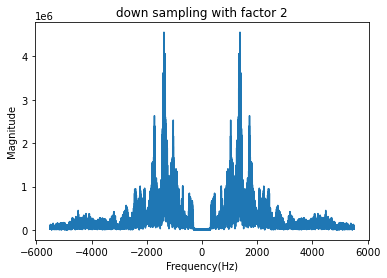

In [ ]:
# Part 4 and 5

x2 = Down_sampler(x, 2, fs)
sd.play(x2,fs)

X2 = fftshift(fft(x2))
f2 = linspace(-fs/2, fs/2, len(X2))

plt.figure()
plt.plot(f2, abs(X2))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')
plt.title('down sampling with factor 2')

Text(0.5, 1.0, 'down sampling and upsampling with factor 4')

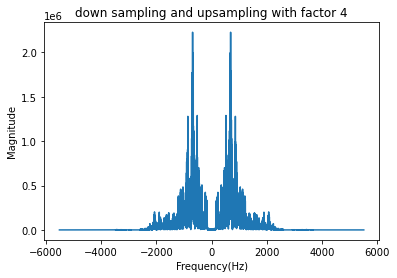

In [ ]:
# Part 6
x3 = Down_sampler(x, 4, fs)
x3 = Up_sampler(x3, 4, fs)
sd.play(x3,fs)

X3 = fftshift(fft(x3))
f3 = linspace(-fs/2, fs/2, len(X3))

plt.figure()
plt.plot(f3, abs(X3))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')
plt.title('down sampling and upsampling with factor 4')


همان‌طور که در زیر مشخص است خروجی دقیقا همان سیگنال اولیه نیست و ما عملا از فرکانس تقریبا ۲۳۰۰ به بعد و هم‌چنین -۲۳۰۰ به قبل را از دست دادیم

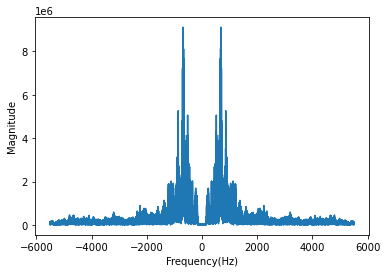


-------------------------------------------------------------------------------
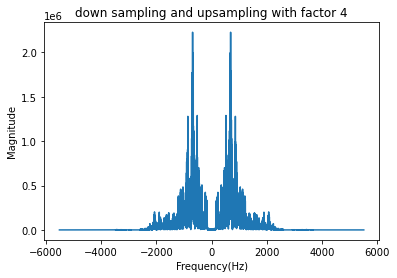